<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Unsupervised%20Learning%20Algorithms/kmeans_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering from Scratch (No Libraries, No Classes)

In this notebook, we implement **K-Means Clustering** using NumPy.

K-Means is an unsupervised learning algorithm that groups data into **K clusters** based on feature similarity.


## What is K-Means Clustering?

K-Means groups `n` data points into `k` clusters by minimizing the distance between points and their assigned cluster's centroid.

### Steps
1. Randomly initialize `k` cluster centroids.
2. Assign each data point to the **nearest centroid**.
3. Recalculate centroids as the **mean of assigned points**.
4. Repeat steps 2-3 until centroids don't change (or max iterations reached).

It’s fast, scalable, and widely used for:
- Customer segmentation
- Image compression
- Pattern recognition


## Generate Sample Data

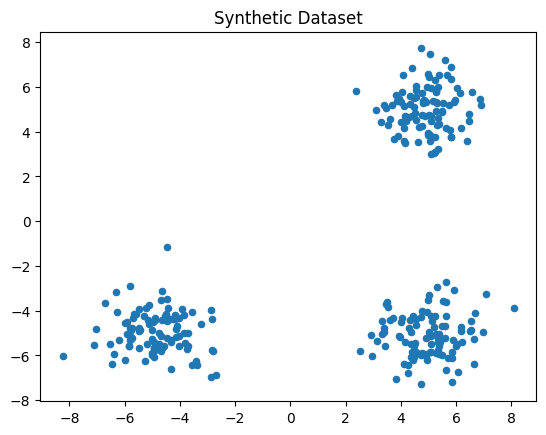

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D data
np.random.seed(42)
X1 = np.random.randn(100, 2) + np.array([5, 5])
X2 = np.random.randn(100, 2) + np.array([-5, -5])
X3 = np.random.randn(100, 2) + np.array([5, -5])
X = np.vstack((X1, X2, X3))

plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Synthetic Dataset")
plt.show()

## K-Means Functions (No Classes)

In [5]:
def initialize_centroids(X, k):
    """Randomly pick k unique points as initial centroids."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    """Assign each point to the nearest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Recompute centroids as the mean of assigned points."""
    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            new_centroids.append(X[np.random.randint(0, X.shape[0])])
        else:
            new_centroids.append(np.mean(cluster_points, axis=0))
    return np.array(new_centroids)

def has_converged(old, new, tol=1e-4):
    return np.all(np.linalg.norm(old - new, axis=1) < tol)

## Run the K-Means Algorithm

In [6]:
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        if has_converged(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

## Run + Visualize Results

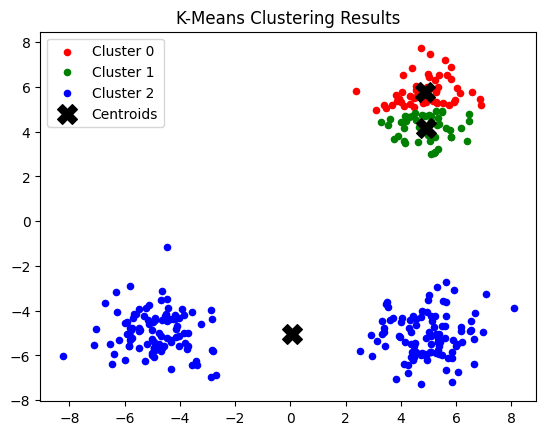

In [7]:
k = 3
final_centroids, final_labels = kmeans(X, k)

# Plot results
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(X[final_labels == i][:, 0], X[final_labels == i][:, 1], s=20, color=colors[i], label=f'Cluster {i}')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=200, marker='X', color='black', label='Centroids')
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

## Summary

- Implemented K-Means from scratch using NumPy
- Learned how to initialize centroids, assign points, and update clusters
- Visualized final cluster groups and centroids

K-Means is one of the most practical clustering techniques for unsupervised learning tasks.
